SPEECH EMOTION RECOGNITION SYSTEM

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
paths = []
labels = []
TESS='/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'
for dirname, _, filenames in os.walk(TESS):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

2800

In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
labels=pd.DataFrame(labels, columns=['Emotions'])
paths=pd.DataFrame(paths, columns=['Path'])

In [6]:
labels.value_counts()

Emotions
angry       400
disgust     400
fear        400
happy       400
neutral     400
ps          400
sad         400
Name: count, dtype: int64

In [7]:
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([path_df,emotion_df], axis=1)
Savee_df.head()

,Path,Emotions
0,/kaggle/input/surrey-audiovisual-expressed-emo...,happy
1,/kaggle/input/surrey-audiovisual-expressed-emo...,fear
2,/kaggle/input/surrey-audiovisual-expressed-emo...,happy
3,/kaggle/input/surrey-audiovisual-expressed-emo...,disgust
4,/kaggle/input/surrey-audiovisual-expressed-emo...,angry


In [8]:
emotion_df.value_counts()

Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64

In [9]:
labels[:5]

,Emotions
0,fear
1,fear
2,fear
3,fear
4,fear


In [10]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = pd.concat([paths,path_df],ignore_index=True)
df['label'] = pd.concat([labels,emotion_df],ignore_index=True)

print(df.head())
print(df.tail())

                                              speech label
0  /kaggle/input/toronto-emotional-speech-set-tes...  fear
1  /kaggle/input/toronto-emotional-speech-set-tes...  fear
2  /kaggle/input/toronto-emotional-speech-set-tes...  fear
3  /kaggle/input/toronto-emotional-speech-set-tes...  fear
4  /kaggle/input/toronto-emotional-speech-set-tes...  fear
                                                 speech     label
3275  /kaggle/input/surrey-audiovisual-expressed-emo...  surprise
3276  /kaggle/input/surrey-audiovisual-expressed-emo...   neutral
3277  /kaggle/input/surrey-audiovisual-expressed-emo...   neutral
3278  /kaggle/input/surrey-audiovisual-expressed-emo...     angry
3279  /kaggle/input/surrey-audiovisual-expressed-emo...     happy


In [11]:
df.loc[df['label'] == 'surprise', 'label'] = 'ps'


In [12]:
df['label'].value_counts()

label
neutral    520
fear       460
angry      460
disgust    460
sad        460
ps         460
happy      460
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

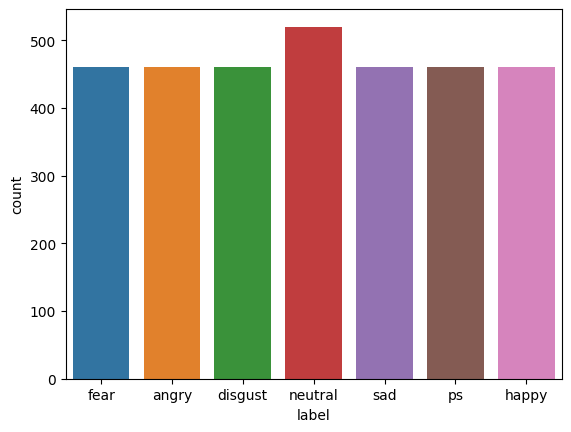

In [13]:
sns.countplot(data=df, x='label')

In [14]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav


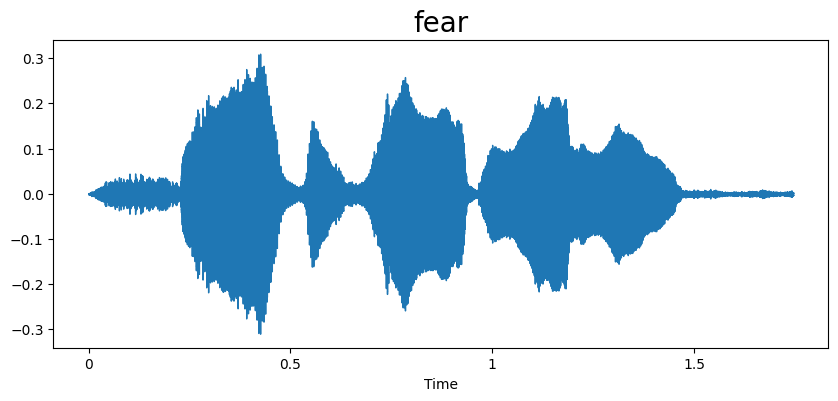

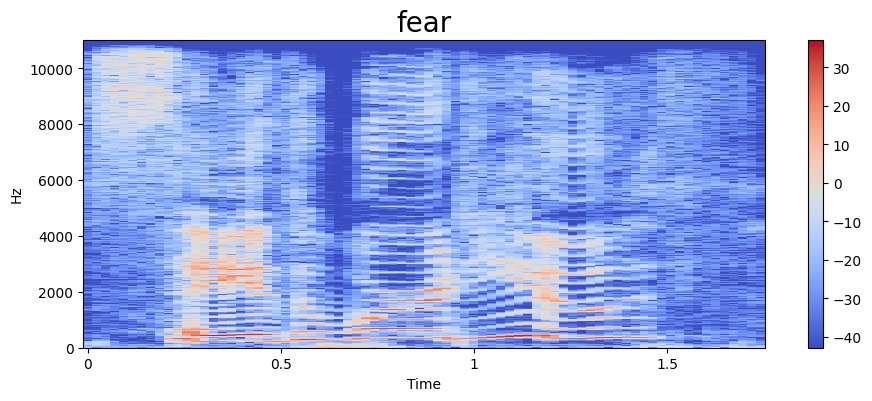

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_happy/YAF_pearl_happy.wav


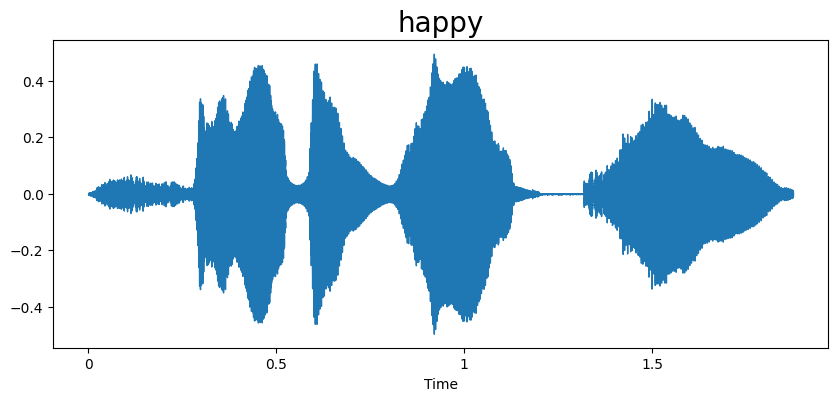

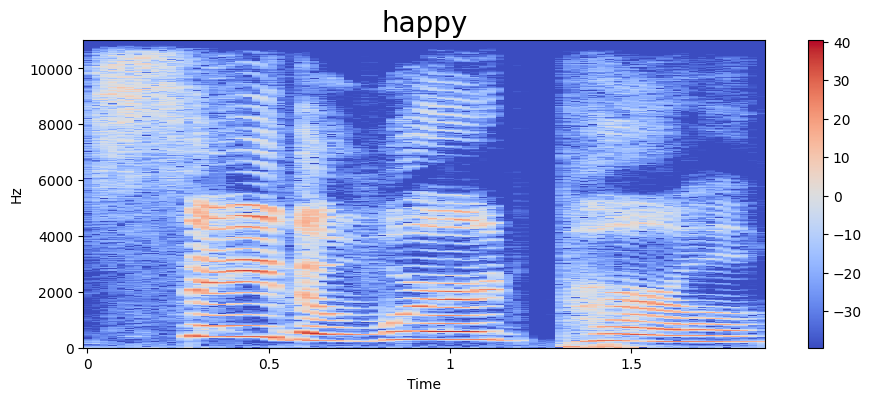

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Sad/OAF_thumb_sad.wav


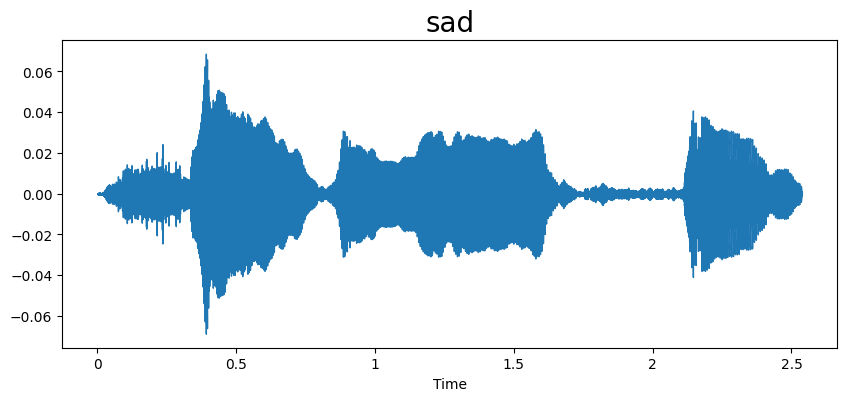

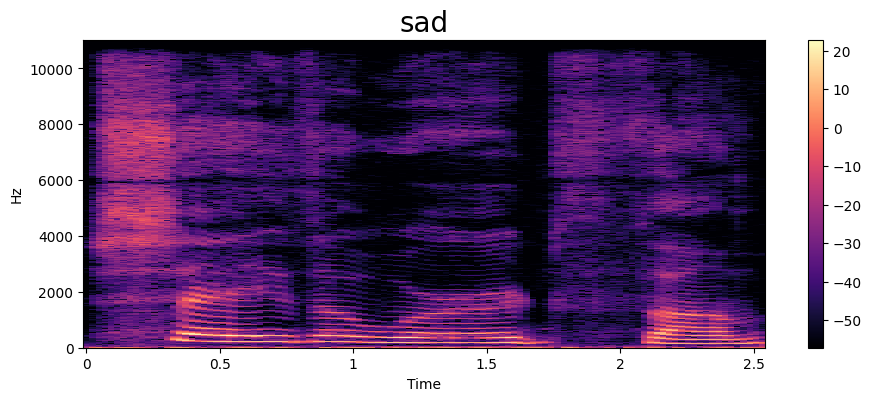

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_half_angry.wav


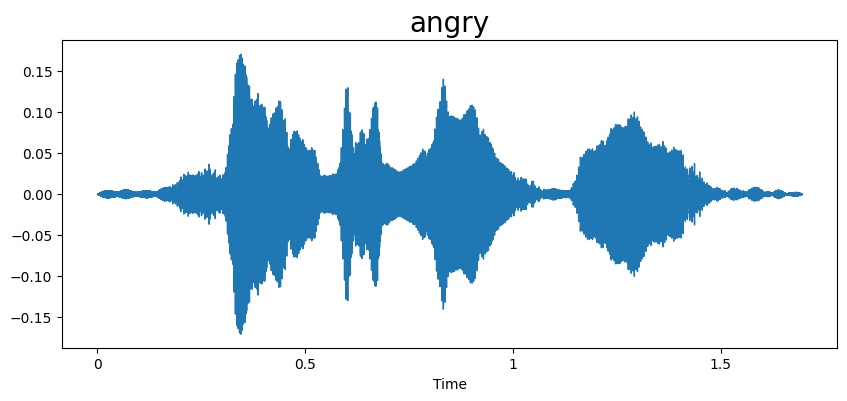

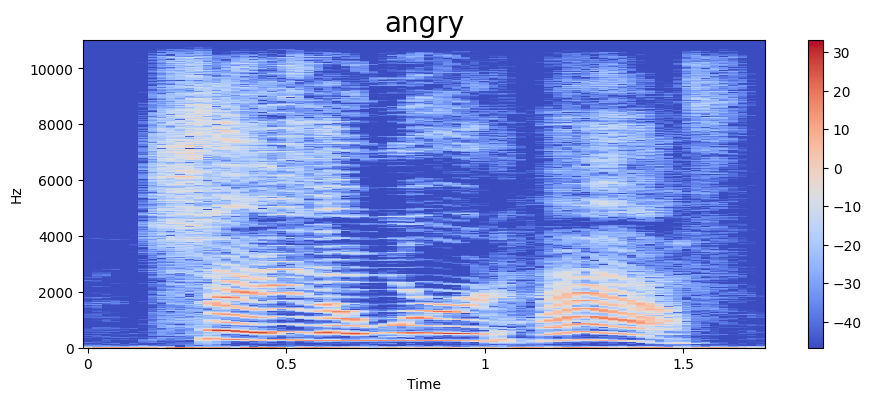

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust/OAF_learn_disgust.wav


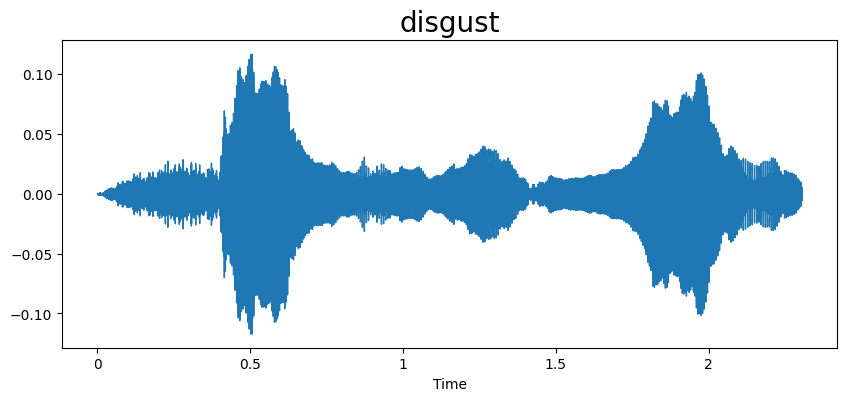

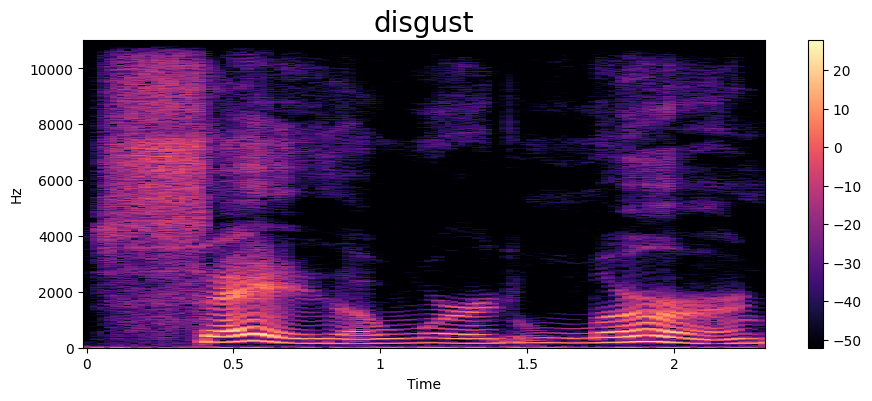

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_dime_neutral.wav


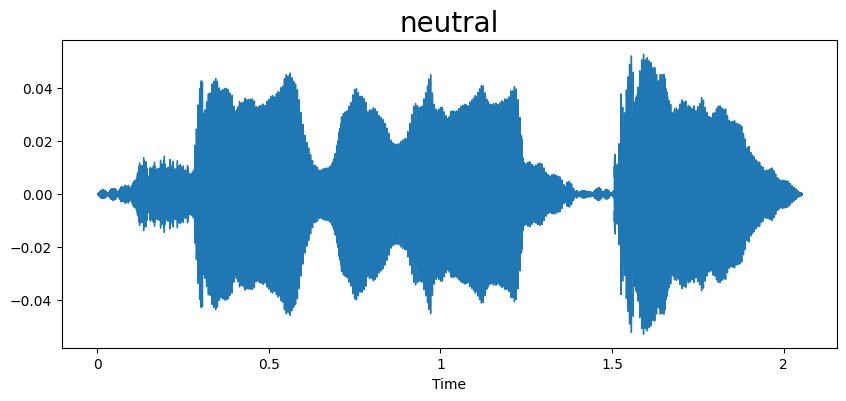

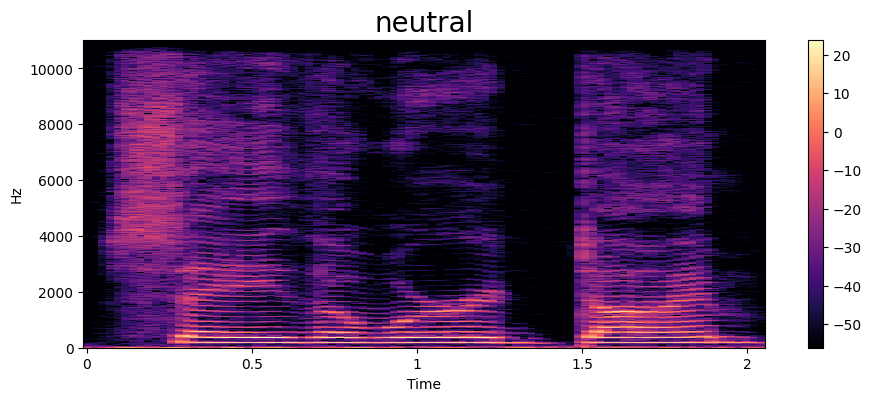

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_pass_ps.wav


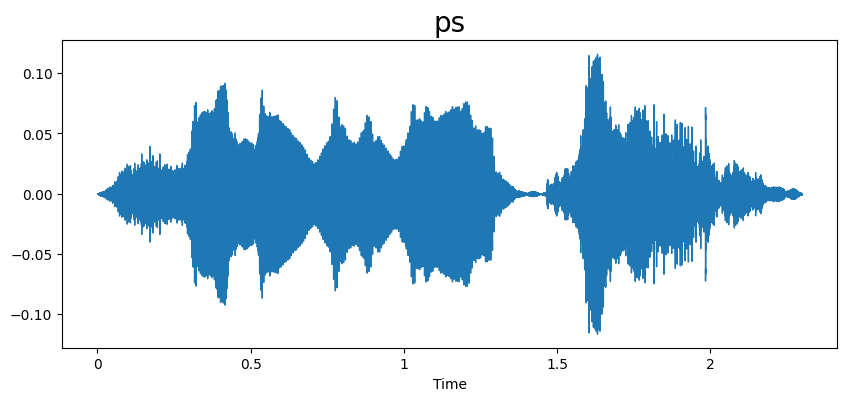

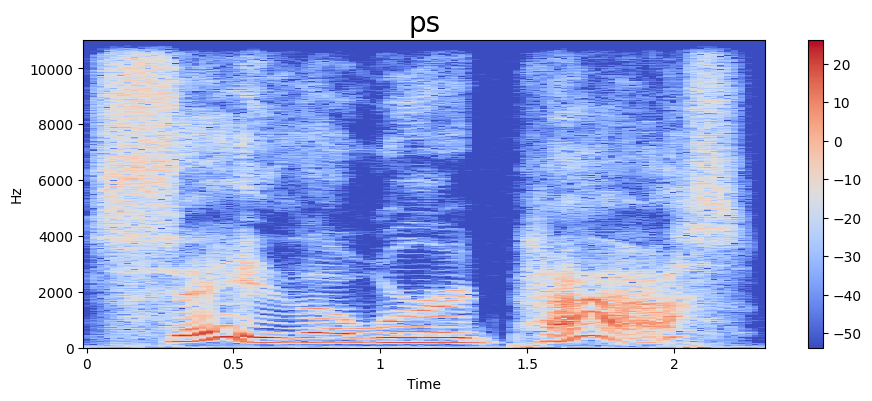

In [15]:
from IPython.display import Audio
emotions_list=['fear','happy','sad','angry','disgust','neutral','ps']
for em in emotions_list:
    emotion = em
    path = np.array(df.speech[df.label == emotion])[1]
#    path = np.array(df['speech'][df['label']==emotion])[0]
    print(path)
    data, sampling_rate = librosa.load(path)
    
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)
    
    display(Audio(data, rate=sampling_rate))


## Feature Extraction

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [17]:
#X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [18]:
#STANDARDIZING DATA
def standardize_data(df):
    X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
    X = [x for x in X_mfcc]
    X = np.array(X)
    print(X.shape)
    X = np.expand_dims(X, -1)
    print(X.shape)
    
    
    enc = OneHotEncoder()
    y = enc.fit_transform(df[['label']])
    y = y.toarray()
    print(y.shape)
    
    return X,y

In [19]:
#extract_mfcc(df['speech'][0])

In [20]:
#X_mfcc

In [21]:
'''X = [x for x in X_mfcc]
X = np.array(X)
X.shape'''

'X = [x for x in X_mfcc]\nX = np.array(X)\nX.shape'

In [22]:
'''## input split
X = np.expand_dims(X, -1)
X.shape'''

'## input split\nX = np.expand_dims(X, -1)\nX.shape'

In [23]:
'''from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])'''

"from sklearn.preprocessing import OneHotEncoder\nenc = OneHotEncoder()\ny = enc.fit_transform(df[['label']])"

In [24]:
#y = y.toarray()

In [25]:
#y.shape

In [26]:
X,y=standardize_data(df)

(3280, 40)
(3280, 40, 1)
(3280, 7)


## Create the LSTM Model

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [28]:
X_train[0]

array([[-3.2385999e+02],
       [ 7.0175262e+01],
       [-5.0372438e+00],
       [-1.4311750e+01],
       [-3.6506561e+01],
       [ 5.7545514e+00],
       [-3.1203115e+00],
       [-2.6649343e+01],
       [-8.6121874e+00],
       [-1.3841394e+00],
       [-1.8788910e+01],
       [ 1.1572888e+01],
       [-2.2600010e+01],
       [ 9.0016222e+00],
       [-2.8776774e+00],
       [-6.1115856e+00],
       [-3.6620610e+00],
       [-3.4863603e+00],
       [-4.8423362e+00],
       [-2.6533649e+00],
       [-7.7256036e+00],
       [-2.2221808e-01],
       [-4.8622994e+00],
       [ 4.0324596e-01],
       [ 9.3693845e-02],
       [-2.8518471e-01],
       [ 4.2102232e+00],
       [ 8.7113276e+00],
       [ 6.4178452e+00],
       [ 1.1211101e+01],
       [ 9.2952547e+00],
       [ 1.6538578e+01],
       [ 1.3100922e+01],
       [ 1.0096188e+01],
       [ 9.9549836e-01],
       [-1.9171280e+00],
       [-2.7515123e+00],
       [ 4.2892122e+00],
       [ 4.1443181e+00],
       [ 1.6775159e+00]],

In [29]:
print(X.size)

131200


In [30]:
import time
def create_seq_model(act_fn):
    print("Begin training on activation function :{}".format(act_fn))
    model = Sequential([
        LSTM(256, return_sequences=False, input_shape=(40,1)),
        Dropout(0.2),
        Dense(128, activation=act_fn),
        Dropout(0.2),
        Dense(64, activation=act_fn),
        Dropout(0.2),
        Dense(7, activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [31]:
 # Train the model
def compile_and_fit(model):
    history = model.fit(X_train, y_train, epochs=100, batch_size=64)
    return history

## Plot the results

In [32]:
def plot_accuracy_curves(history):
    epochs = list(range(100))
    acc = history.history['accuracy']
    loss = history.history['loss']

    plt.plot(epochs, acc, label='train accuracy')
    plt.plot(epochs, loss, label='loss')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [33]:
def evaluate_model(model):
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

    # Print the test accuracy
    print("Test Accuracy:{}\nTest Loss:{}".format(test_accuracy,test_loss))
    

In [34]:
def plot_confusion_matrix(model):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    labels = ['angry', 'ps', 'sad', 'happy', 'fear', 'disgust','neutral']
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred, labels=range(7))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion matrix')
    plt.show()

In [35]:
import time as t

Start training using activation function : linear
Begin training on activation function :linear
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                          

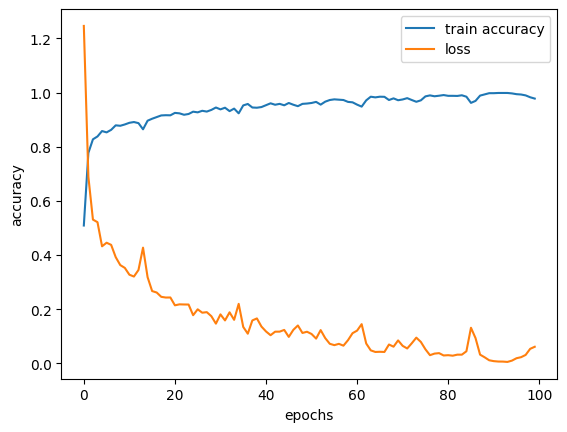

26/26 - 1s - loss: 0.4136 - accuracy: 0.9256 - 1s/epoch - 45ms/step
Test Accuracy:0.9256097674369812
Test Loss:0.41356992721557617
26/26 [==============================] - 1s 26ms/step


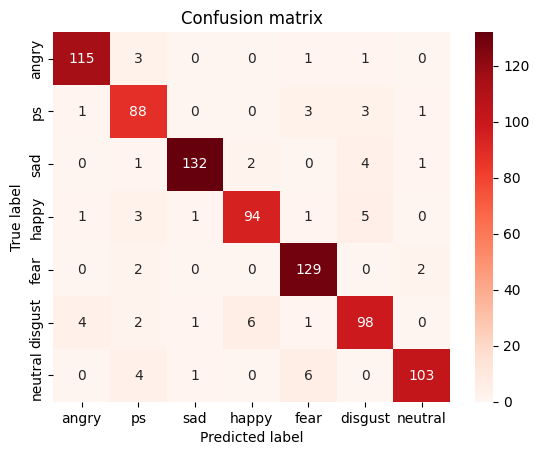

Start training using activation function : sigmoid
Begin training on activation function :sigmoid
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                      

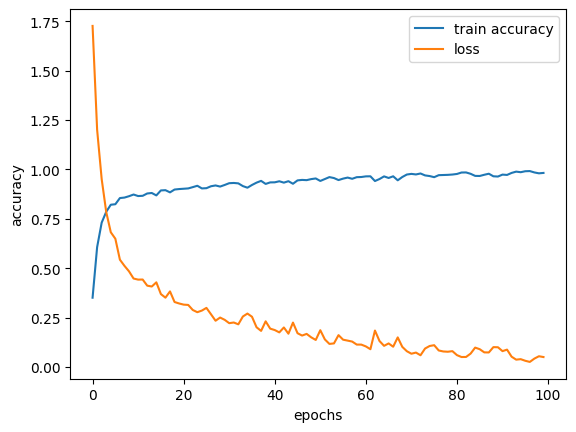

26/26 - 1s - loss: 0.2846 - accuracy: 0.9341 - 1s/epoch - 50ms/step
Test Accuracy:0.9341463446617126
Test Loss:0.28460967540740967
26/26 [==============================] - 1s 27ms/step


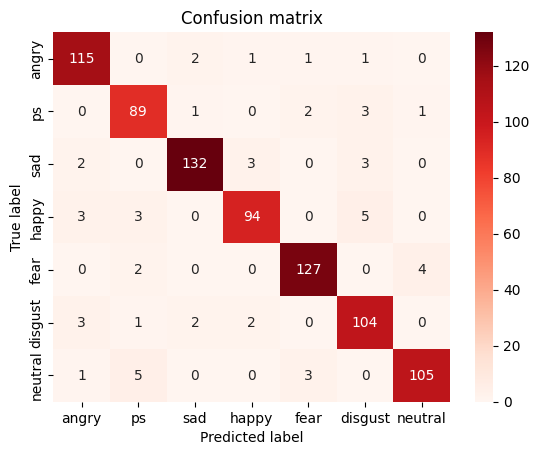

Start training using activation function : tanh
Begin training on activation function :tanh
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                            

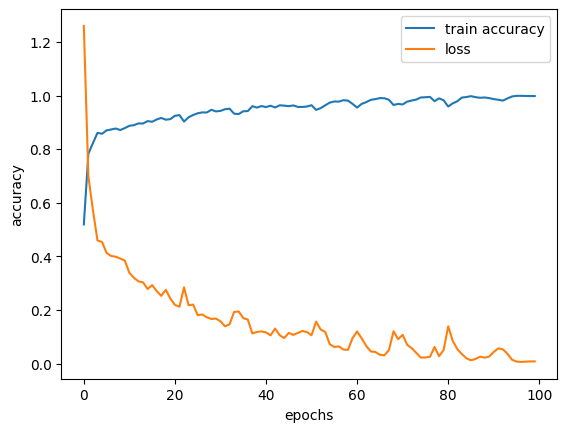

26/26 - 1s - loss: 0.3692 - accuracy: 0.9317 - 1s/epoch - 44ms/step
Test Accuracy:0.9317073225975037
Test Loss:0.3692057430744171
26/26 [==============================] - 1s 26ms/step


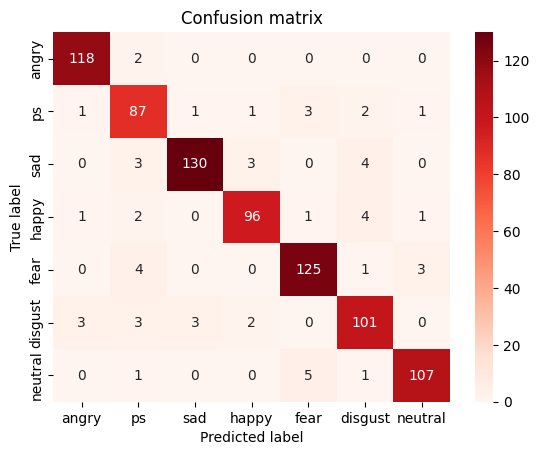

Start training using activation function : softmax
Begin training on activation function :softmax
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                      

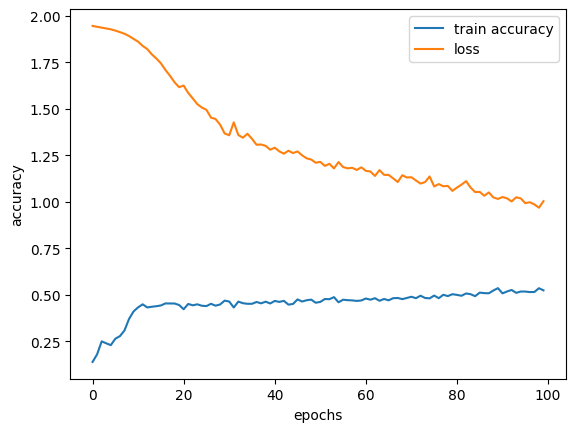

26/26 - 1s - loss: 0.8376 - accuracy: 0.5927 - 1s/epoch - 49ms/step
Test Accuracy:0.5926828980445862
Test Loss:0.8375723361968994
26/26 [==============================] - 1s 27ms/step


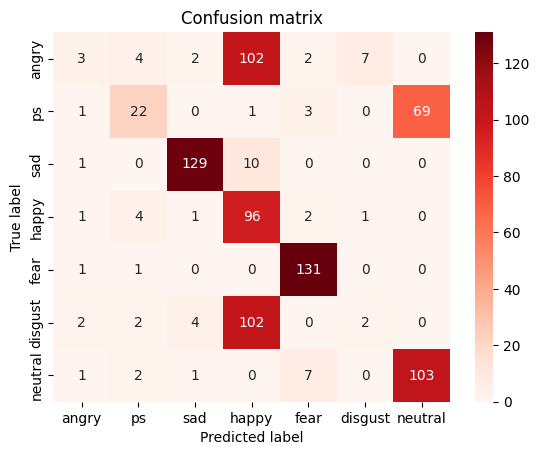

Start training using activation function : elu
Begin training on activation function :elu
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                              

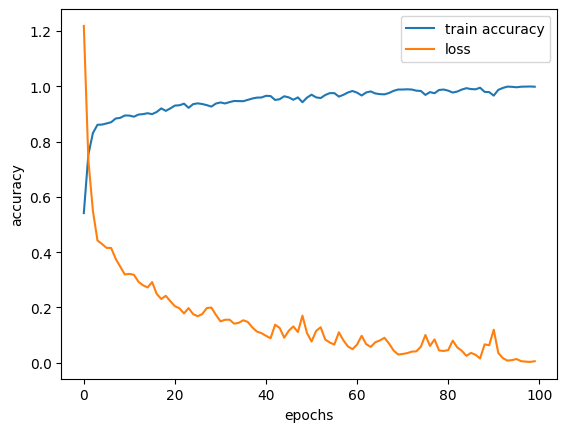

26/26 - 1s - loss: 0.3619 - accuracy: 0.9317 - 1s/epoch - 47ms/step
Test Accuracy:0.9317073225975037
Test Loss:0.3618676960468292
26/26 [==============================] - 1s 28ms/step


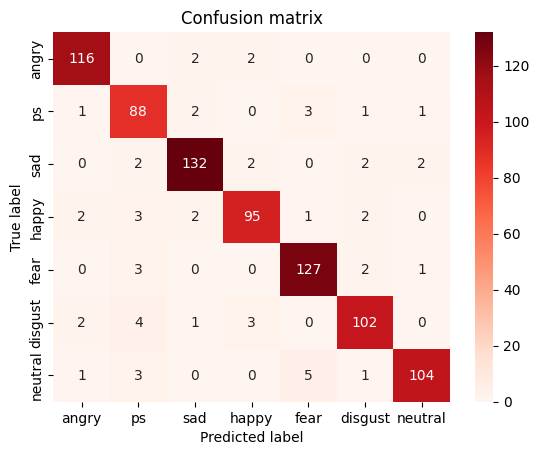

Start training using activation function : relu
Begin training on activation function :relu
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                            

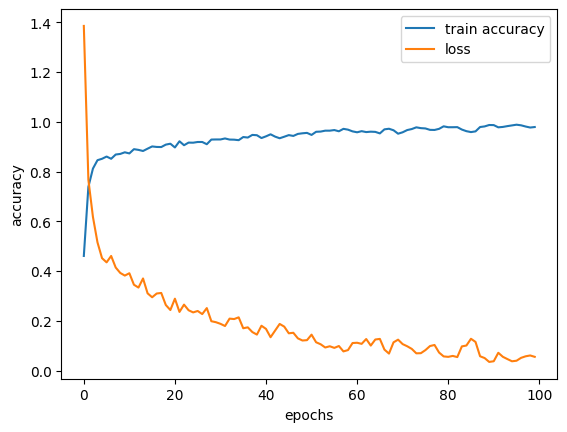

26/26 - 1s - loss: 0.3274 - accuracy: 0.9268 - 1s/epoch - 46ms/step
Test Accuracy:0.9268292784690857
Test Loss:0.32743263244628906
26/26 [==============================] - 1s 27ms/step


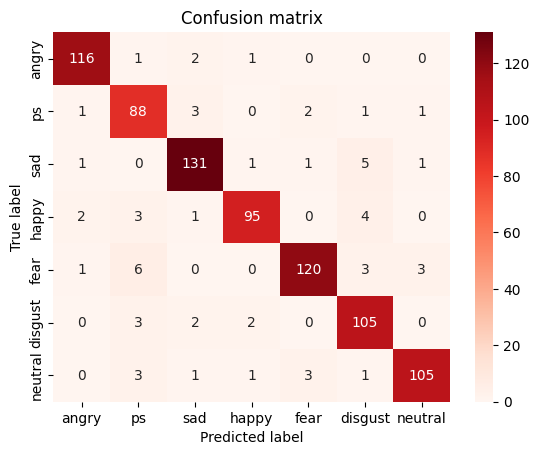

In [36]:
act_fx=["linear","sigmoid","tanh","softmax","elu","relu"]

for act in act_fx:
    start_time=t.time()
    print("Start training using activation function :",act)
    model=create_seq_model(act)
    history = compile_and_fit(model)
    end_time=t.time()
    print("Training complete on above activation function in time :",end_time-start_time)
    plot_accuracy_curves(history)
    evaluate_model(model)
    plot_confusion_matrix(model)